<a href="https://colab.research.google.com/github/doom160/stockTechnicalAnalysis/blob/master/stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance 
!pip install lxml
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import yfinance as yf
plt.style.use('fivethirtyeight')
plt2.style.use('fivethirtyeight')


In [55]:
ticker = "MCD"
stock = yf.Ticker(ticker)

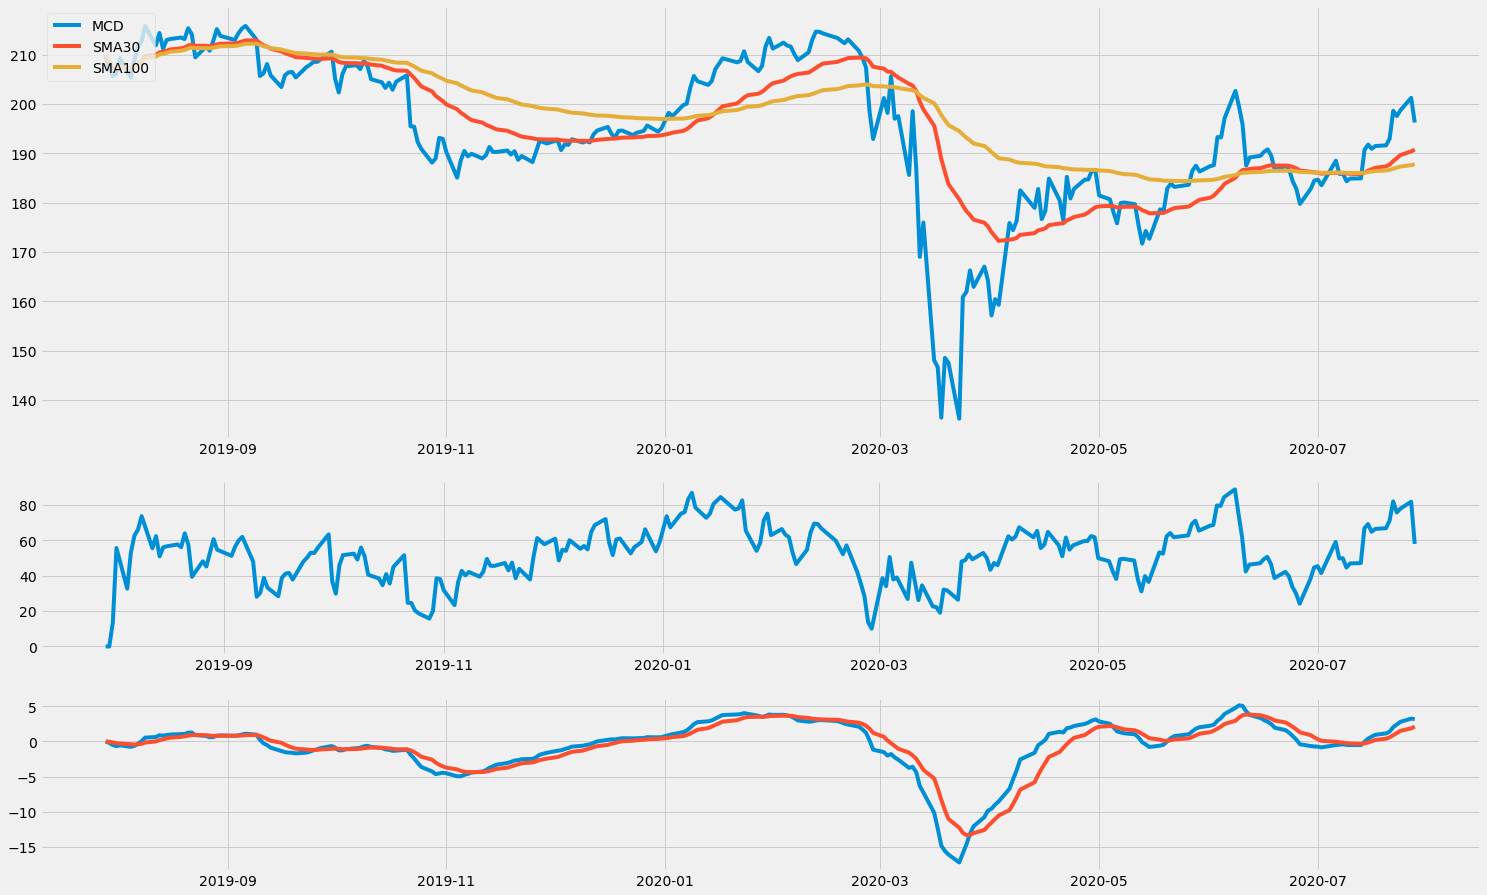

In [60]:
plt.figure(figsize=(20,12))
ax1 = plt.axes([0,0.5,1,0.5])
ax3 = plt.axes([0,0.25,1,0.2])
ax2 = plt.axes([0,0,1,0.2])

hist = stock.history(period="1y")
ax1.plot(hist['Close'], label=ticker)

SMA30 = pd.DataFrame()
SMA30['price'] = hist['Close'].ewm(span=30).mean()
ax1.plot(SMA30['price'], label='SMA30')

SMA100 = pd.DataFrame()
SMA100['price'] = hist['Close'].ewm(span=100).mean()
ax1.plot(SMA100['price'], label='SMA100')

# MACD
SMA12 = pd.DataFrame()
SMA12['price'] = hist['Close'].ewm(span=12,adjust=False).mean()
SMA26 = pd.DataFrame()
SMA26['price'] = hist['Close'].ewm(span=26,adjust=False).mean()
MACD = pd.DataFrame()
MACD = SMA12 - SMA26
MACD_SIGNAL = pd.DataFrame()
MACD_SIGNAL = MACD.ewm(span=9,adjust=False).mean()

ax2.plot(MACD, label='SMA12')
ax2.plot(MACD_SIGNAL, label='SMA26')



delta = hist['Close'].diff()

# Make the positive gains (up) and negative gains (down) Series
up, down = delta.copy(), delta.copy()
up[up < 0] = 0
down[down > 0] = 0
# Calculate the EWMA
roll_up1 = up.ewm(span=14).mean()
roll_down1 = down.abs().ewm(span=14).mean()
# Calculate the RSI based on EWMA
RS1 = roll_up1 / roll_down1
RSI1 = 100.0 - (100.0 / (1.0 + RS1))
ax3.plot(RSI1, label='RSI')

#macd_min = pd.DataFrame()
#macd_max = pd.DataFrame()
#macd_d = pd.DataFrame()
#macd_min['Low'] = hist['Low'].rolling(window = 10).min()
#macd_max['High'] = hist['High'].rolling(window = 10).max()
#macd_k = (hist['Close'] - macd_min['Low'])/ (macd_max['High']- macd_min['Low']) * 100
#macd_d = macd_k.rolling(window = 3).mean()


#ax2.plot(macd_k,label='K Fast')
#ax2.plot(macd_d,label='D Slow')
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
ax3.legend(loc='upper left')
plt.show()